# Coursera Capstone: UK Road Accident Data, 2015

This notebook is to be used exclusively for the Coursera Capstone project.

## Background and Objectives


Reducing accidents on the road represents a major objective of all governments around the world. During 2018 on the UK's roads alone, the number of killed or seriously injured (KSI) amounted to 27295. Total prevention costs from reported road accidents amounted to 16.5 billion British pounds in 2018. Between 2010 and 2018, figures had grown by approximately 9 percent, while the lowest figure had been recorded in 2013. On average a fatal accident resulted in nearly 2.2 million British pounds in prevention costs in 2018, while slight accidents resulted in costs of £26,100.

Gaining insight into how the statistics of KSI can be reduced is therefore of critical importance to the government's aims, in order to improve the safety for UK citizens whilst travelling, as well as for economic reasons.

This notebook seeks to investigate and come to some conclusions regarding data on road accidents, in particular what features of accidents we can link to their severity, and how we can use these features to accurately predict this characteristic. If we can understand some causes or correlations of KSI on the road, we can hopefully reduce the negative statistics.
This would allow them to take steps to mitigate and reduce the severity of accidents on the country's roads, thereby improving public health and wellbeing.

## Data Preparation 

The data I will analyse was compiled and published by the UK Government's Department for Transport, is sourced at https://www.kaggle.com/akshay4/road-accidents-incidence, and is comprised of data on accidents and a range of characteristics of vehicles concerned. I intend to analyse the data-set's features, and see which may be correlated to our target variable (accident severity). This feature can have discrete integer values 1 ('slight'), 2 ('Severe') or 3 ('Fatal).

This data-set (.csv) reflects Road Accidents in UK during 2015 and has 70 features/columns and about 250K rows.

The data set consists of the following features, which are a mixture of string, integer, and continuous (float) objects pertaining to the vehicle as well as the particular environmental conditions at the time of the accident,: 

accident_index	vehicle_reference	vehicle_type	towing_and_articulation	vehicle_manoeuvre	vehicle_location-restricted_lane	junction_location	skidding_and_overturning	hit_object_in_carriageway	vehicle_leaving_carriageway	hit_object_off_carriageway	1st_point_of_impact	was_vehicle_left_hand_drive?	journey_purpose_of_driver	sex_of_driver	age_of_driver	age_band_of_driver	engine_capacity_(cc)	propulsion_code	age_of_vehicle	driver_imd_decile	driver_home_area_type	vehicle_imd_decile	Number_of_Casualities_unique_to_accident_index	No_of_Vehicles_involved_unique_to_accident_index	location_easting_osgr	location_northing_osgr	longitude	latitude	police_force	accident_severity	number_of_vehicles	number_of_casualties	date	day_of_week	time	local_authority_(district)	local_authority_(highway)	1st_road_class	1st_road_number	road_type	speed_limit	junction_detail	junction_control	2nd_road_class	2nd_road_number	pedestrian_crossing-human_control	pedestrian_crossing-physical_facilities	light_conditions	weather_conditions	road_surface_conditions	special_conditions_at_site	carriageway_hazards	urban_or_rural_area	did_police_officer_attend_scene_of_accident	lsoa_of_accident_location	casualty_reference	casualty_class	sex_of_casualty	age_of_casualty	age_band_of_casualty	casualty_severity	pedestrian_location	pedestrian_movement	car_passenger	bus_or_coach_passenger	pedestrian_road_maintenance_worker	casualty_type	casualty_home_area_type	casualty_imd_decile.

To analyse this dataset I will use standard Python libraries Pandas, NumPy and Matplotlib to assess correlations between features and the target variable Accident Severity. Prior to training and testing machine learning models, I will look to clean, change object type, balance, possibly normalise or standardise the data, perform feature-engineering, fill in or delete rows with missing values and so on. I will likely return to the data preparation stage at later points in my analysis. As there are a lot of features, I will seek to select the ones which seem most closely correlated with the target variable.

As part of my analysis, I also want to understand what trends or skewed information there are in the data.

Once I have found some useful correlations, I will train and test different supervised learning models to see if any can accurately predict the target variable values. I will evaluate the models' performance, and fine tune their parameters if necessary. 

As the target variable is a categorical and not continuous variable (1, 2 or 3), I will test out a range of classification models (K-Nearest-Neighbours, Logistical Regression etc.), and see which performs best.


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
df=pd.read_csv('kaagle_upload.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Early exploration of the data

Let's see what features we have, what kind of data-types they are, and what proportion of null values we have. As there are some 'null' values (more below), I need to decide what to do with these data-points.

The target data-type is already an integer. This is good as the skitlearn models require this.

In [216]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-null  int64  
 9   vehi

Let's have a look at the shape and first few rows of the dataframe.

In [217]:
print(df.shape)
df[0:10]

(285331, 70)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201506E098780,2,1,0,9,0,5,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
7,201506E098792,2,9,0,4,0,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,201506E098804,1,9,0,14,0,1,0,0,0,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
9,201506E098826,1,9,0,4,0,0,0,0,0,...,5.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0


## Target variable balance

Checking that there is a balance of 'severity' data-points. It seems there is a reasonably balanced distribution, but this may be something I need to come back to if the models learn just to predict '3' incorrectly.

In [218]:
df['accident_severity'].value_counts()

3    242477
2     39206
1      3648
Name: accident_severity, dtype: int64

## Missing values

The data shows some points relating to the below features were marked as '-1' or 'Unclassified', or '8'/'9' ('other'; 'unknown', in the case of weather conditions). I will change these to NaN, as I want to know how many actual data-points I have before I decide what to do with these missing values in order to be able to plot the data and see which features may have predictive value.


The data below indicates all the 'imd' features are now entirely composed of 'null' values. This is because the values were all 'unclassified' in the original dataset.

Likewise, the 'sex of driver' column had possible values of 1,2 or 3 (3 being 'unclassified'). 

In [219]:
df=df.replace([-1, 'Unclassified'], np.nan)
df['weather_conditions']=df['weather_conditions'].replace([8, 9], np.nan)
df['sex_of_driver']=df['sex_of_driver'].replace([3], np.nan)
#Sanity check to see whether this has worked
print(df['weather_conditions'].value_counts())
df['sex_of_driver'].value_counts()

1.0    233216
2.0     31375
4.0      4716
5.0      4627
7.0      1404
3.0      1050
6.0       357
Name: weather_conditions, dtype: int64


1.0    187557
2.0     81078
Name: sex_of_driver, dtype: int64

The below shows there are now more 'null' values.

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285273 non-null  float64
 3   towing_and_articulation                           285056 non-null  float64
 4   vehicle_manoeuvre                                 285173 non-null  float64
 5   vehicle_location-restricted_lane                  285178 non-null  float64
 6   junction_location                                 285259 non-null  float64
 7   skidding_and_overturning                          285179 non-null  float64
 8   hit_object_in_carriageway                         285192 non-null  float64
 9   vehi

I want to convert the 'time' values to date-time objects, and drop those rows without values (there are not many). Dropping the 'null' records for 'carriageway hazards'.

In [221]:
df['time'] = pd.to_datetime(df['time'])

Towing and articulation data-points below very unbalanced data (almost all 'no tow/articulation'). I will leave this out, for this reason.

In [222]:
df['towing_and_articulation'].value_counts()

0.0    281045
1.0      2691
4.0       921
5.0       198
3.0       138
2.0        63
Name: towing_and_articulation, dtype: int64

## Data cleaning

I will drop the rows with missing values from the following features, which I wish to plot, as there are quite a lot of missing values.

In [223]:
df.dropna(subset = ['road_surface_conditions', 'urban_or_rural_area', 'car_passenger', 'age_of_driver', 'weather_conditions', 'age_of_vehicle', 'sex_of_driver', 'vehicle_type', 'light_conditions', 'speed_limit', 'carriageway_hazards', 'road_type', 'day_of_week'], inplace=True)
df.shape

(120808, 70)

## Plotting the data to see correlations

Below we can see the greater overall proportion of drivers involved in accidents is male, as well as in serious and fatal ones. The spread over days of the week is quite even.

Male = 1.0; Female = 2.0; day 6=Saturday

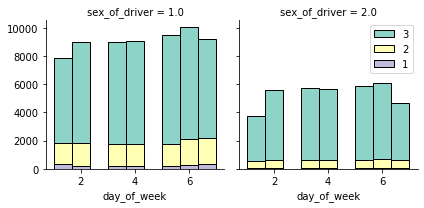

In [224]:
import seaborn as sns

bins=np.linspace(df.day_of_week.min(), df.day_of_week.max(), 10)
g = sns.FacetGrid(df, col="sex_of_driver", hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'day_of_week', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()



The below chart shows that, for both genders, drivers around 25 years' old seem to represent the peak age for likelihood of being involved in all categories of road accidents, with the data gradually declining from that point. The proportion of severe accidents also seems to follow this trend. I am perhaps slightly surprised the peak is not slightly lower, as in the UK it is legal to drive from age 17.

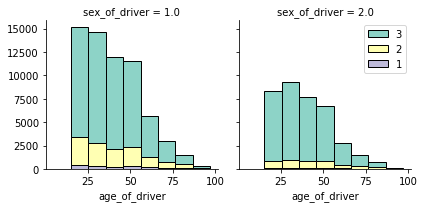

In [225]:
bins=np.linspace(df.age_of_driver.min(), df.age_of_driver.max(), 10)
g = sns.FacetGrid(df, col="sex_of_driver", hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'age_of_driver', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()



The below chart seems to show that the data is heavily unbalanced for weather conditions data-points (almost all of the points relate to 'fine weather'). There is also not much relationship between weather type and accident severity.

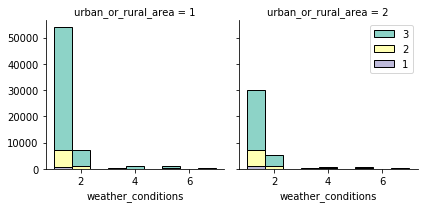

In [226]:
bins=np.linspace(df.weather_conditions.min(), df.weather_conditions.max(), 10)
g = sns.FacetGrid(df, col='urban_or_rural_area', hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'weather_conditions', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()



From the below we can see the data is fairly unbalanced in favour of there being no carriageway hazards.

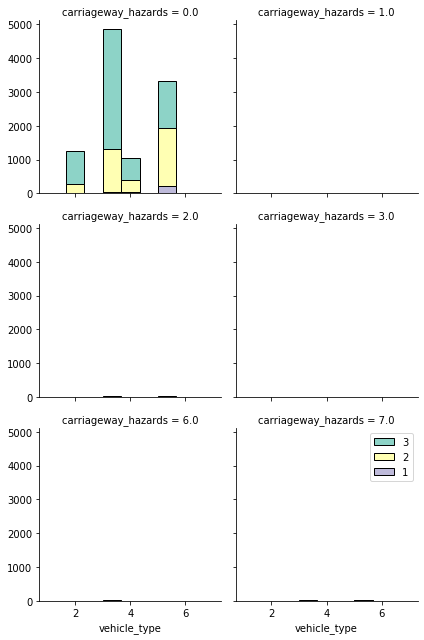

In [227]:
bins=np.linspace(df.weather_conditions.min(), df.weather_conditions.max(), 10)
g = sns.FacetGrid(df, col='carriageway_hazards', hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'vehicle_type', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

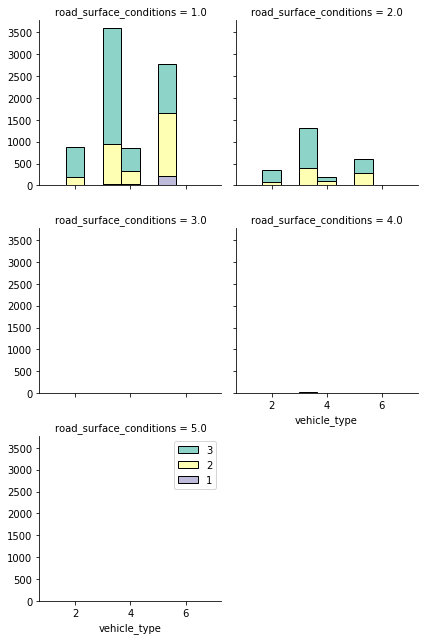

In [228]:
bins=np.linspace(df.weather_conditions.min(), df.weather_conditions.max(), 10)
g = sns.FacetGrid(df, col='road_surface_conditions', hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'vehicle_type', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

The above seems to be interesting: a much higher proportion of accidents occurring on dry road conditions. There are very few results for  road conditions including Snow
Frost or ice, Flood over 3cm. deep, Oil or diesel, Mud. I will drop these columns.

In [229]:
df['road_surface_conditions']=df['road_surface_conditions'].replace([3, 4, 5, 6, 7], np.nan).dropna()
df['road_surface_conditions'].value_counts()

1.0    86564
2.0    32644
Name: road_surface_conditions, dtype: int64

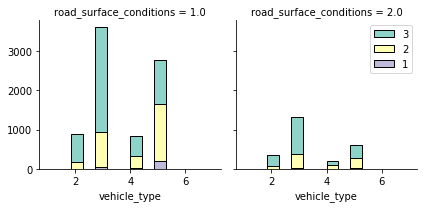

In [230]:
bins=np.linspace(df.weather_conditions.min(), df.weather_conditions.max(), 15)
g = sns.FacetGrid(df, col='road_surface_conditions', hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'vehicle_type', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

This is a lot clearer. Here you can see there is a clear correlation between occurrence of accidents (and higher proportion of serious/fatal) on dry roads, which is somewhat surprising. We can also see a perhaps unsurprising higher incidence of serious and fatal accidents on Motorcycle over 500cc (vehicle type 5). Motorcyles under 500c (number 4) seem not to be quite as bad.

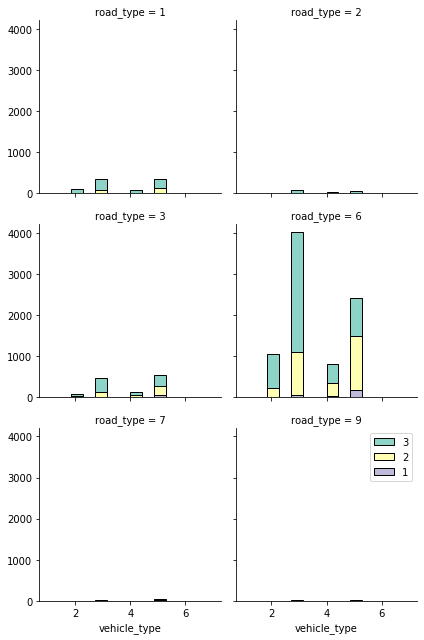

In [231]:
bins=np.linspace(df.weather_conditions.min(), df.weather_conditions.max(), 15)
g = sns.FacetGrid(df, col='road_type', hue="accident_severity", palette="Set3", col_wrap=2, hue_order=[3,2,1])
g.map(plt.hist, 'vehicle_type', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

As we can see above, there is a clear correlation between accidents occurring on a single-carriageway (road-type '6') as opposed to dual-carriageway etc. 

# Getting rid of null values for our features

In [232]:
df[['road_type', 'road_surface_conditions', 'sex_of_driver', 'vehicle_type']].isnull().sum()

road_type                     0
road_surface_conditions    1600
sex_of_driver                 0
vehicle_type                  0
dtype: int64

In [233]:
df.dropna(subset = ["road_surface_conditions"], inplace=True)
df['road_surface_conditions'].isnull().sum()

0

In [234]:
df_1=df[['sex_of_driver', 'vehicle_type', 'road_surface_conditions', 'road_type']]

In [235]:
df_1.isnull().sum()

sex_of_driver              0
vehicle_type               0
road_surface_conditions    0
road_type                  0
dtype: int64

In [236]:
df.shape

(119208, 70)

## Creating X feature and y target variable arrays

I'm going to create NumPy arrays for our chosen features, before normalising their values using Sklearn's standardscaler. I am going to do this as the scales are different across the features, so they need to be converted into comparable values with equal weights. I will then create our chosen target variable array, and I will see how it performs on a Logistic Regression model.

In [237]:
X = np.asarray(df_1)
X[0:5]

array([[ 1., 20.,  1.,  6.],
       [ 2.,  3.,  1.,  3.],
       [ 1.,  9.,  1.,  3.],
       [ 1.,  9.,  1.,  3.],
       [ 2.,  9.,  1.,  6.]])

In [238]:
y = np.asarray(df['accident_severity'])


In [239]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.73,  1.9 , -0.61,  0.54],
       [ 1.37, -1.07, -0.61, -1.31],
       [-0.73, -0.02, -0.61, -1.31],
       [-0.73, -0.02, -0.61, -1.31],
       [ 1.37, -0.02, -0.61,  0.54]])

## Splitting the data using train_test_split


In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (95366, 4) (95366,)
Test set: (23842, 4) (23842,)


## Logistic Regression

The logistic regression algorithm can predict categorical target variable values, as well as provide an estimated probability of each feature variable value belonging to which category. Let's see how it performs. I have added a regularisation parameter to try and prevent overfitting on the data.

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
yhat = LR.predict(X_test)
print(yhat[0:5])
print(y[0:5])

[3 3 3 3 3]
[3 3 3 3 3]


In [244]:
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob[0:5])


[[0.03 0.22 0.75]
 [0.02 0.18 0.8 ]
 [0.02 0.19 0.78]
 [0.01 0.11 0.88]
 [0.02 0.18 0.8 ]]


## Model evaluation

In [246]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("LR F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

LR Jaccard index: 0.83
LR F1-score: 0.76
LR LogLoss: 0.50


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## A good result?

As we can see above, this Logistic Regression model predicts a result based on a probability percentage that the model has that a data-point belongs to a particular category. Though it seems that our model performed well, I am somewhat worried that it has learnt to predict the value '3' just because that is what is predominantly represented within the data. Let's have a look at a confusion matrix to obtain more granularity on the predicted results.

In [247]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[3,2,1]))

[[19874     0     0]
 [ 3557     0     0]
 [  411     0     0]]


Confusion matrix, without normalization
[[19874     0     0]
 [ 3557     0     0]
 [  411     0     0]]


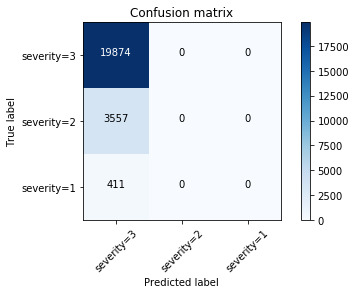

In [248]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[3,2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=3','severity=2', 'severity=1'],normalize= False,  title='Confusion matrix')

## Unbalanced results

As we can see in the above confusion matrix, the model has not labelled any points as anything but 3!!

Decision Tree models tend to do better with unbalanced data-sets, so I will see how well that performs before making any further decisions.

## Decision Tree

In [249]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [250]:
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[3 3 3 3 3]
[3 3 3 3 3]


In [251]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree))
print("DT F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )

DT Jaccard index: 0.83
DT F1-score: 0.76


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


As we can see above, in terms of the Jaccard index and F1-score the two models have performed similarly.

The models score highly, but I am worried it is assuming every point is a '3', and is not learning to generalise effectively (overfitting on the data).

If this model was trying to predict presence of a rare disease, predicting 'no' all the time might seem like a good strategy. But, crucially, it will get 0% right when the patient does have the disease!

## Balance the data-set

To attempt to deal with the unbalanced nature of this data-set, I am going to shuffle the data, and ensure that our target variable values (slight, severe, and fatal accidents) are equally represented within our training and test data. Therefore, I am going to reduce the number of data-points labelled as '2' and '3' to the same number as '1' (2042).

In [252]:
df['accident_severity'].value_counts()

3    99621
2    17545
1     2042
Name: accident_severity, dtype: int64

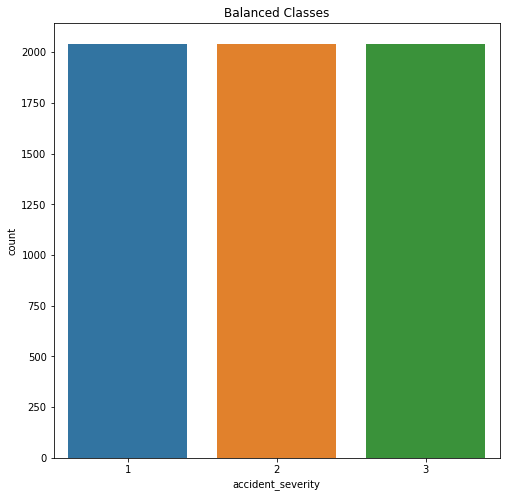

In [253]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
class_1_df = shuffled_df.loc[shuffled_df['accident_severity'] == 1]

class_2_df= shuffled_df.loc[shuffled_df['accident_severity'] == 2].sample(n=2042,random_state=42)

#Randomly select 492 observations from the non-fraud (majority class)
class_3_df = shuffled_df.loc[shuffled_df['accident_severity'] == 3].sample(n=2042,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([class_1_df, class_2_df, class_3_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('accident_severity', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

## Re-create X and y arrays and normalise the X

In [254]:
X=np.asarray(normalized_df[['age_of_driver', 'age_of_vehicle', 'sex_of_driver', 'vehicle_type', 'light_conditions', 'speed_limit']])
X[0:5]
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.25,  0.62,  1.65, -0.06, -0.64,  1.02],
       [ 0.6 ,  2.63, -0.6 , -0.6 , -0.64,  1.02],
       [ 0.26,  0.99, -0.6 , -0.06,  0.95, -0.92],
       [-0.63,  0.25, -0.6 , -0.06,  2.02,  1.67],
       [-0.97,  0.8 , -0.6 ,  1.57, -0.64, -0.92]])

In [255]:
y = np.asarray(normalized_df['accident_severity'])
y [0:5]

array([1, 1, 1, 1, 1])

## Split the train and test data again

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4900, 6) (4900,)
Test set: (1226, 6) (1226,)


## Logistic Regression - classification model 1

In [257]:
LR_1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_1

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
y_hat_1 = LR_1.predict(X_test)
print(y_hat_1[0:15])
print(y[0:15])

[3 3 1 2 2 3 1 3 3 3 3 3 2 3 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [259]:
yhat_1_prob = LR_1.predict_proba(X_test)
yhat_1_prob

array([[0.23, 0.38, 0.39],
       [0.29, 0.34, 0.37],
       [0.46, 0.33, 0.2 ],
       ...,
       [0.33, 0.35, 0.32],
       [0.48, 0.3 , 0.23],
       [0.33, 0.34, 0.33]])

In [260]:
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, y_hat_1))
print("LR F1-score: %.2f" % f1_score(y_test, y_hat_1, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_1_prob))

LR Jaccard index: 0.46
LR F1-score: 0.43
LR LogLoss: 1.02


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Results

As we can see above, the logistic regression model has not really learnt the trends underlying the data. It is not really sure what to predict. Let's see if the decision tree performs any better.

## Decision Tree - classification model 2

In [261]:
drugTree_1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree_1
drugTree_1.fit(X_train,y_train)
predTree_1 = drugTree_1.predict(X_test)
print (predTree_1 [0:20])
print (y_test [0:20])

[3 2 1 3 1 3 1 3 1 3 3 2 3 2 2 3 1 1 1 1]
[3 3 1 2 2 2 1 2 3 3 2 3 3 2 1 2 3 1 1 3]


In [262]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree_1))
print("DT F1-score: %.2f" % f1_score(y_test, predTree_1, average='weighted') )

DT Jaccard index: 0.46
DT F1-score: 0.42


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Predictive power?

The results for the decision tree algorithm are similar as for logistic regression. This seems to indicate that the features I have chosen do not really possess predictive power against the severity of a road accident. I will test a couple more models to see whether this is the correct assumption.

## K Nearest Neighbours - classification model 3

In [263]:
from sklearn.neighbors import KNeighborsClassifier
k = 3  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model
yhat_1 = kNN_model.predict(X_test)
yhat_1[0:5]
y_test[0:5]

array([3, 3, 1, 2, 2])

In [264]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat_2 = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat_2==y_test);
    
    std_acc[n-1]=np.std(yhat_2==y_test)/np.sqrt(yhat_2.shape[0])
mean_acc

array([0.49, 0.49, 0.49, 0.5 , 0.48, 0.48, 0.5 , 0.49, 0.47, 0.48, 0.48,
       0.48, 0.47, 0.47])

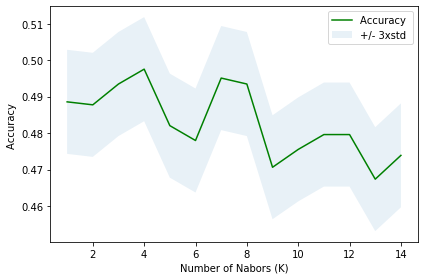

In [265]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [266]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.49755301794453505 with k= 4


In [267]:
k = 4
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [268]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.50
KNN F1-score: 0.49


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Our highest-performing K here was 4. This is the best-performing model, so far. Let's try the last classification model.

## Support Vector Machine - model 4

In [269]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
y_hat_3 = SVM_model.predict(X_test)
y_hat_3

array([3, 3, 1, ..., 3, 1, 3])

In [270]:
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, y_hat_3))
print("SVM F1-score: %.2f" % f1_score(y_test, y_hat_3, average='weighted') )

SVM Jaccard index: 0.50
SVM F1-score: 0.47


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Results and Discussion

Although I think I selected features with decent predictive ability, in the first instance my classification models overfitted a data-set with unbalanced target data and the models went for the majority target variable value. 
My method for dealing with this unbalanced data was to re-balance it, but this caused the classification models to underperform perhaps because the re-balanced data did not reflect the actual distribution in real-life of the accident severity categories and therefore the predicted results were therefore roughly evenly split. The models had not learnt the data's underlyind trends effectively.

A couple of methods I could use to mitigate against this low performance are using a metric like AOC-weighted, which performs better with imbalance, as well as making increased use of hyper-parameters (regularisation) to penalise incorrect classifications. Regularisation is traditionally used to penalise against overfitting when there is not much data but a lot of features.

## Conclusion

Having tested out four classification models on selected features from a comprehensive road accident data-set, I tried to test how well these features could predict the severity of an accident on new data. Although this was not entirely successful, in that I have not been able to create a model which adequately predicts the target variable, I was able to identify an imbalance in the data and modify my approach to deal with this. If I was to continue with this project, I would try out further methods to deal with the classification models' tendency to predict the majority category class. For me, additionally, it has been a very useful learning process to practise some of the knowledge I have obtained whilst learning about data science, in particular exploring methods to deal with an unbalanced data-set. 